In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"MyDrive/ML"

/content/drive/MyDrive/ML


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matches = pd.read_csv("matches.csv")
matches[matches['winner'].isnull() == True]
matches['winner'].fillna('No result',inplace=True)
ipl_df = matches

In [ ]:
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'},inplace=True)
ipl_df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

In [ ]:
ipl_df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
#it'll return all rows having atleast one NaN value in any column
#axis=1 is used for vertical axis i.e for columns.
NaN_df = ipl_df[ipl_df.isna().any(axis=1)]
#To make the seaching easier ,use style.highlight_null to highlight all null values present in our dataframe with red colour
NaN_df.style.highlight_null(null_color='red')
ipl_df['city'].fillna('Dubai',inplace=True)

In [ ]:
# Now we want to find table of 'cities' and count of total matches played there.
# groupby() is use to divide the dataframe on the basis of 'city' and separately count total id of each city
cities = ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


In [ ]:
#it will rename the 'id' column,and inplace=True makes the changes permanent
cities.rename(columns={'id':'matches'},inplace=True)

#it will sort the data in ascending order of matches played in each city
#reset_index() is use to reset the index starting from 0
cities = cities.sort_values('matches',ascending=False).reset_index()

#To start the index with 1
cities.index=np.arange(1,len(cities)+1)

# background_gradient() use to create Heatmap within dataframe .The higher is the color shade, the larger is the value present.
cities.style.background_gradient()

,city,matches
1,Mumbai,101
2,Bengaluru,80
3,Kolkata,77
4,Delhi,74
5,Hyderabad,64
6,Chennai,57
7,Jaipur,47
8,Chandigarh,46
9,Pune,38
10,Durban,15


In [ ]:
season_df = ipl_df.groupby('Season')[['id']].count()
season_df

,id
Season,
IPL-2008,58
IPL-2009,57
IPL-2010,60
IPL-2011,73
IPL-2012,74
IPL-2013,76
IPL-2014,60
IPL-2015,59
IPL-2016,60


In [ ]:
# First we'll extract our required data 
winner_df = ipl_df.groupby('winner')[['id']].count()
# sort this table in descending order
winner_df = winner_df.sort_values('id', ascending=False).reset_index()
# remove the data of 'Draw/Cancelled' bcoz it does not represent any team
winner_df=winner_df[:][winner_df['winner']!='Draw/Cancelled']
winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner_df.index=np.arange(1,len(winner_df)+1)
winner_df.style.background_gradient()

,Teams,wins
1,Mumbai Indians,109
2,Chennai Super Kings,100
3,Kolkata Knight Riders,92
4,Sunrisers Hyderabad,87
5,Royal Challengers Bangalore,84
6,Kings XI Punjab,82
7,Delhi Capitals,77
8,Rajasthan Royals,75
9,Rising Pune Supergiant,27
10,Gujarat Lions,13


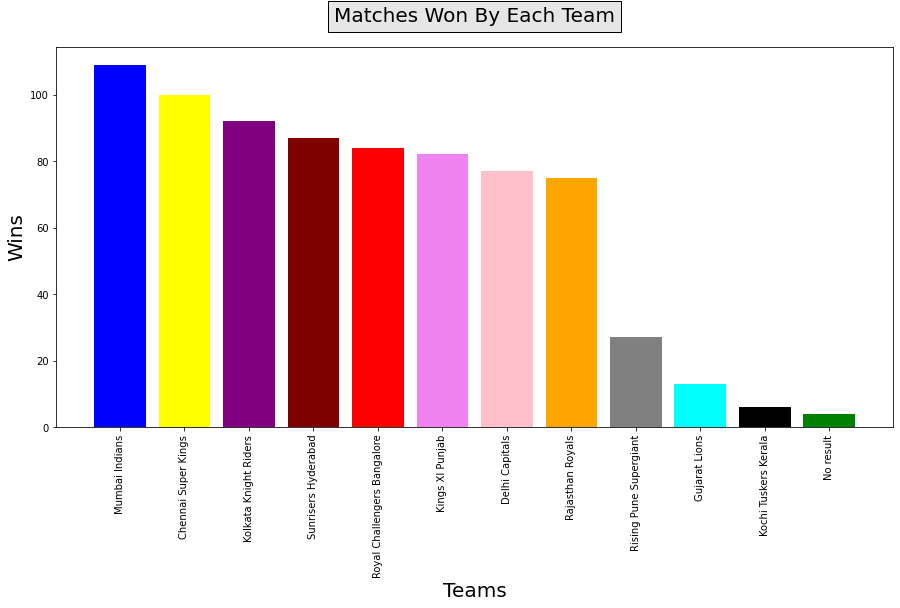

In [ ]:
#Plotting Wins vs Teams
#We will be using colour code of teams jersey to make it easily understandable
plt.figure(figsize=(15,7))
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Wins',fontsize=20)
#to set the tick size to 40
plt.tick_params(labelsize=10)
#to rotate the ticks in x axis by 90 degree
plt.xticks(rotation=90)
plt.title('Matches Won By Each Team',fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25);
plt.bar(winner_df.Teams, winner_df.wins, color = ['blue','yellow','purple','maroon','red','violet','pink','orange','grey','aqua','black','green']);

In [ ]:
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()


#Now we'll sort this data in more organised manner by renaming it's column's names.
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decision_df.style.hide_index()

Decision,Total
bat,293
field,463


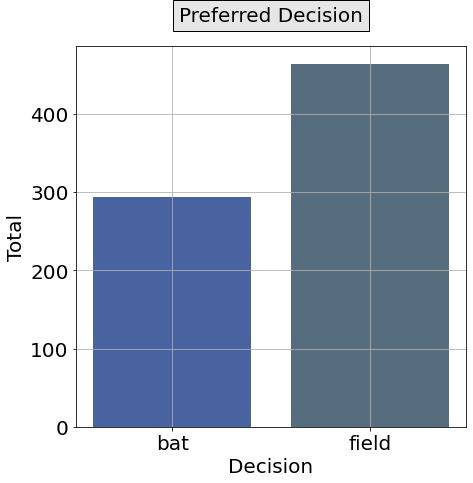

In [ ]:
#Lets plot the Result
plt.figure(figsize=(7,7))
plt.title("Preferred Decision",fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25)
plt.xlabel('Decision',fontsize=20)
plt.ylabel('Total',fontsize=20)
#to set the tick parameters
plt.tick_params(labelsize=20)
plt.grid()
plt.bar(decision_df.Decision, decision_df.Total, color=['#4863A0','#566D7E']);

In [ ]:
final_df = ipl_df.groupby('Season').tail(1).copy()
final_df=final_df.sort_values('Season')
final_df=final_df.reset_index(drop=True)


def highlight_data(x):
    df=x.copy()
    df.loc[:,:]='background-color:darkgrey'
    df.winner='background-color:yellow'
    return df
final_df.style.apply(highlight_data,axis=None)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,nan
1,174,IPL-2009,Johannesburg,24-05-2009,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,nan
2,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,nan
3,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,nan
4,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,nan
5,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,nan
6,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,nan
7,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,nan
8,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,nan
9,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,nan


In [ ]:
final_count_df=final_df.groupby('winner')[['id']].count()
#now arrange the data in a more organised manner.
final_count_df.rename(columns={'id':'no of times','winner':'winner'},inplace=True)
final_count_df=final_count_df.reset_index()
final_count_df.style.hide_index().background_gradient()

winner,no of times
Chennai Super Kings,3
Kolkata Knight Riders,2
Mumbai Indians,4
Rajasthan Royals,1
Sunrisers Hyderabad,2


In [ ]:
ipl_df.team1.unique().shape

(11,)